# Energy efficiency

## Realise en python 3 avec sklearn (Energy efficiency Data Set)
### Resume
 - Importation bibliotheque
 - Exploration des donnees 
 - Analayse statistique et traitements des donnees
 - Creation d'un modele de regression arbre de decision
     - apprentissage evaluation sur le jeu de donnees
     - evaluation sur le jeu de donnees
     - optimisation avec GridSearchCV
 - Creation d'un modele de regression de foret aleatoire
     - apprentissage evaluation sur le jeu de donnees
     - evaluation sur le jeu de donnees
     - optimisation avec GridSearchCV
 - Creation d'un modele de regression d'arbre extra
     - apprentissage evaluation sur le jeu de donnees
     - evaluation sur le jeu de donnees
     - optimisation avec GridSearchCV
 - Conclusion

### Importation des bibliotheques

In [193]:
#Importation des bibliotheques
import numpy as np # Algebre lineaire
import pandas as pd # Traitement des donnes
import pandas_profiling as pd_r

import matplotlib.pyplot as plt # Pour les figures
%matplotlib inline
import seaborn as sns # Pour la vizualisation
sns.set_style('whitegrid')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, precision_recall_curve, auc, r2_score

### Exploration des donnees, analayse statistique, traitements de donnees

In [3]:
# Importation de notre jeu de donnees
df = pd.read_csv('data/df_chauffage.csv')

In [4]:
df.columns # afficher le nom des colonnes de notre jeu de donnees

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
# nous renomons ici les colonnes de notre jeu de donnees
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [6]:
df.head() # affichons par defaut les cinq premieres lignes de notre dataframe

relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [32]:
df.isna().sum() # pour verifier s'il y a des valeurs manquantes

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [7]:
df.describe() # statistique descriptive

relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       heating_load  cooling_load  
count    768.000000    768.000000  
mean      22.307201     24.587760  
std       10.090196      9.513306  
min        6.010000     10.900000  
25%       12.992500     15.620000  
50%       18.950000     22.080000  
75%       31.667500     33.132500  
max       43.100000     48.030000

In [8]:
df.info() # informations sur les colonnes de notre dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [15]:
pd_r.ProfileReport(df) # Nos variables et leur distribution

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


In [16]:
df['cooling_load'].unique() # valeurs unique de la colonne Y2= "cooling_load", l'une des deux sorties

array([21.33, 28.28, 25.38, 25.16, 29.6 , 27.3 , 21.97, 23.49, 27.87,
       23.77, 21.46, 21.16, 24.93, 37.73, 31.27, 30.93, 39.44, 29.79,
       29.68, 29.4 , 10.9 , 11.19, 10.94, 11.17, 11.27, 11.72, 11.29,
       11.67, 11.74, 12.05, 11.73, 11.93, 12.4 , 12.23, 12.14, 16.78,
       16.8 , 16.75, 16.67, 12.07, 12.22, 12.08, 12.04, 26.47, 26.37,
       26.44, 26.29, 32.92, 29.87, 29.58, 34.33, 30.89, 25.6 , 27.03,
       31.73, 27.31, 24.91, 24.61, 28.51, 41.68, 35.28, 34.43, 43.33,
       33.87, 34.07, 34.14, 33.67, 13.43, 13.71, 13.48, 13.7 , 13.8 ,
       14.28, 13.87, 14.27, 14.61, 14.3 , 14.45, 13.9 , 13.72, 13.88,
       13.65, 19.37, 19.43, 19.34, 19.32, 14.34, 14.5 , 14.33, 25.95,
       25.63, 26.13, 25.89, 32.54, 29.44, 29.36, 34.2 , 30.91, 27.36,
       31.9 , 27.38, 25.02, 24.8 , 28.79, 41.07, 34.62, 42.86, 33.91,
       34.17, 33.78, 13.39, 13.57, 13.79, 13.67, 14.11, 14.21, 13.2 ,
       13.54, 13.32, 13.51, 14.86, 14.75, 15.  , 14.74, 19.23, 19.3 ,
       14.37, 14.57,

### Visualisation des donnees

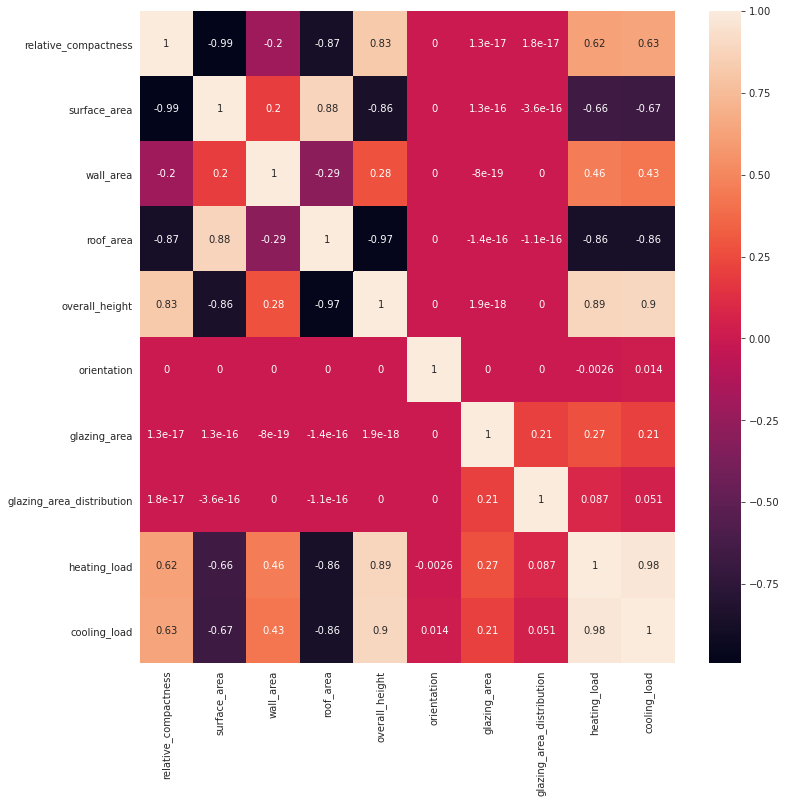

In [19]:
# Appercu de la correlation des variables de notre jeu de donnees (pour connaitre ces valeurs en nombre)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [20]:
# Changons le format des nombres (pour une meilleure lecture)
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
df.corr()

relative_compactness  surface_area  wall_area  \
relative_compactness                       1.00         -0.99      -0.20   
surface_area                              -0.99          1.00       0.20   
wall_area                                 -0.20          0.20       1.00   
roof_area                                 -0.87          0.88      -0.29   
overall_height                             0.83         -0.86       0.28   
orientation                                0.00          0.00       0.00   
glazing_area                               0.00          0.00      -0.00   
glazing_area_distribution                  0.00         -0.00       0.00   
heating_load                               0.62         -0.66       0.46   
cooling_load                               0.63         -0.67       0.43   

                           roof_area  overall_height  orientation  \
relative_compactness           -0.87            0.83         0.00   
surface_area                    0.88           -0.86         0.00   
wall_area                      -0.29            0.28         0.00   
roof_area                       1.00           -0.97         0.00   
overall_height                 -0.97            1.00         0.00   
orientation                     0.00            0.00         1.00   
glazing_area                   -0.00            0.00         0.00   
glazing_area_distribution      -0.00            0.00         0.00   
heating_load                   -0.86            0.89        -0.00   
cooling_load                   -0.86            0.90         0.01   

                           glazing_area  glazing_area_distribution  \
relative_compactness               0.00                       0.00   
surface_area                       0.00                      -0.00   
wall_area                         -0.00                       0.00   
roof_area                         -0.00                      -0.00   
overall_height                     0.00                       0.00   
orientation                        0.00                       0.00   
glazing_area                       1.00                       0.21   
glazing_area_distribution          0.21                       1.00   
heating_load                       0.27                       0.09   
cooling_load                       0.21                       0.05   

                           heating_load  cooling_load  
relative_compactness               0.62          0.63  
surface_area                      -0.66         -0.67  
wall_area                          0.46          0.43  
roof_area                         -0.86         -0.86  
overall_height                     0.89          0.90  
orientation                       -0.00          0.01  
glazing_area                       0.27          0.21  
glazing_area_distribution          0.09          0.05  
heating_load                       1.00          0.98  
cooling_load                       0.98          1.00

<Figure size 360x360 with 0 Axes>

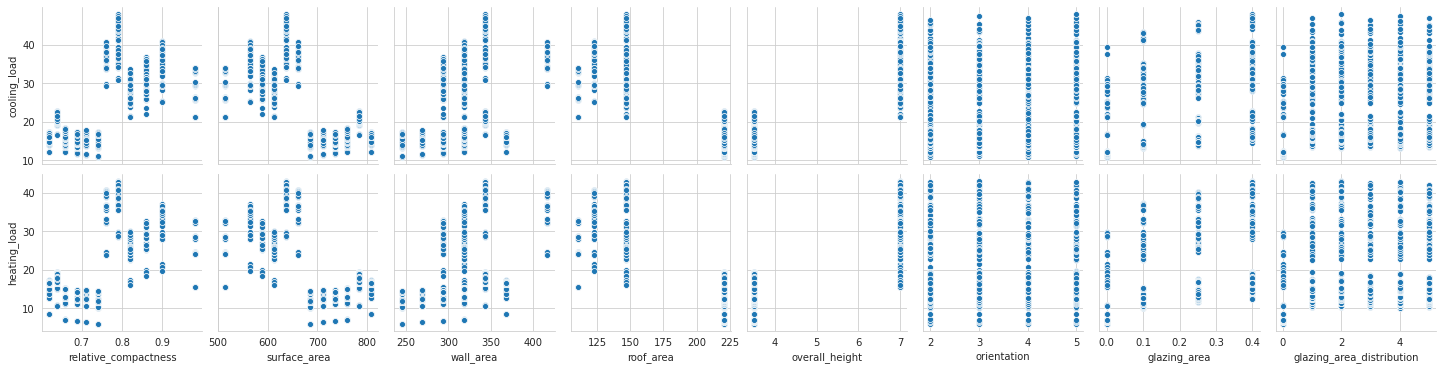

In [30]:
# Correlation entre les samples(inputs/entrees) et les targets(outputs/sorties)
plt.figure(figsize=(5,5))
sns.pairplot(data=df, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

In [34]:
# Chaque fonctionnalité a une échelle différente, car nous pouvons voir 
# les valeurs minimum et maximum pour chacune des variables. 
# Pour obtenir une meilleure échelle, il est bon de normaliser 
# les données car cela améliore les distributions.
normalizer = Normalizer(copy=False)
X = df.drop(['heating_load','cooling_load'], axis=1) # supprimons Y1 et Y2 de notre df
X = normalizer.fit_transform(X) # normalisons notre df
y = df[['heating_load','cooling_load']] # sauvegardons Y1 et Y2 dans une variable de sortie "y"

### Decoupage du jeu de donnees

In [78]:
# Diviser notre dataframe en train set et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40) 
print(len(X_train),'données d\'apprentissage')
print(len(X_test),'données de test')

537 données d'apprentissage
231 données de test


### Modele Regression Arbre de decision (Apprentissage, evaluation et visualisation)

In [79]:
# Creation de notre premier modele avec DecisionTreeRegressor 
dt_model = DecisionTreeRegressor(random_state = 40)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=40)

In [194]:
# Les scores du modele et prediction sur l'ensemble test avant optimisation
dtScore_train = "%.3f" % dt_model.score(X_train, y_train)
dtScore_test = "%.3f" % dt_model.score(X_test, y_test)
print("Train: ",dtScore_train)
print("Test: ",dtScore_test)

Train:  1.000
Test:  0.966


In [81]:
# Prediction sur le modele avec l'ensemble de test (avec R2 score) avant optimisation
y_pred = dt_model.predict(X_test)
R2 = np.mean(r2_score(y_test, y_pred))
print('R2 score = %.3f' % R2)

R2 score = 0.966


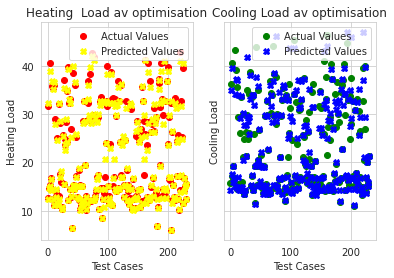

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" avant optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" avant optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

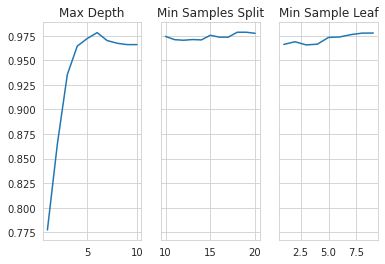

In [86]:
# Pour trouver les meilleurs parametre d'optimisation de l'arbre
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
# Max profondeur
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=40, max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min feuille decoupee
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=40, min_samples_split=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

# Min feuille d'echantillon
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=40, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax3.plot(dt_samples_leaf,dt_acc)
ax3.set_title('Min Sample Leaf')

plt.show()

### Optimisation de notre modele de regression d'arbre de decision avec GridSearchCV

In [96]:
# Pour l'optimisation de notre modele avec GridSearchCV
param = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}


# Creation d'un nouveau en utilisant GridSearch
dt_random = GridSearchCV(dt_model, param, cv=10)
dt_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=40),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [16, 17, 18]})

In [98]:
# Les scores du modele et prediction sur l'ensemble test apres optimisation
dt_rd_Score_train = "%.3f" % dt_random.score(X_train, y_train)
dt_rd_Score_test = "%.3f" % dt_random.score(X_test, y_test)
print("Train: ",dt_rd_Score_train)
print("Test: ",dt_rd_Score_test)

Train:  0.982
Test:  0.978


In [147]:
# les meilleurs parametres du modele apres optimisation
dt_random.best_params_

{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 16}

In [153]:
# Prediction sur le modele avec l'ensemble de test (avec R2 score) apres optimisation
y_pred = dt_random.predict(X_test)
R2 = np.mean(r2_score(y_test, y_pred))
print('R2 score = %.3f' % R2)
# 0u
y_pred1 = dt_random.best_estimator_.predict(X_test)
R2_ = np.mean(r2_score(y_test, y_pred1))
print('R2 score = %.3f' % R2_)

R2 score = 0.978
R2 score = 0.978


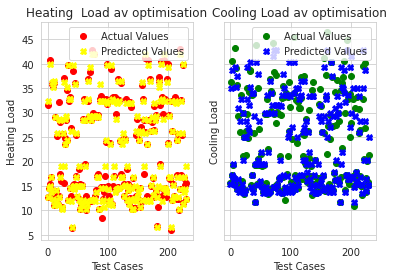

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [154]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" apres optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" apres optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

In [152]:
# Prediction sur le modele avec le jeu de test
# y_pred = dt_model.predict(X_test)
# print(df['heating_load'][5:10], df['cooling_load'][5:10], y_pred[[1,2,3,4,5]])

R2 score = 0.978


### Modele Regression Foret aleatoire (Apprentissage, evaluation et visualisation)

In [158]:
# Creation du modele de foret aleatoire
rf_model = RandomForestRegressor(random_state=40)
# Entrainement du modele
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=40)

In [191]:
# Les scores du modele et prediction sur l'ensemble test avant optimisation
rfScore_train = "%.3f" % rf_model.score(X_train, y_train)
rfScore_test = "%.3f" % rf_model.score(X_test, y_test)
print("Train: ",rfScore_train)
print("Test: ",rfScore_test)

Train:  0.997
Test:  0.975


In [159]:
# Valeurs predites avant optimisation
y_pred2 = rf_model.predict(X_test)
R2 = np.mean(r2_score(y_test, y_pred2))
print('R2 score = %.3f' % R2)

R2 score = 0.975


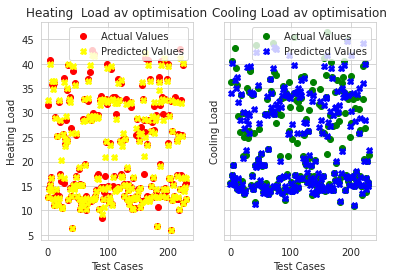

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [160]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" avant optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred2[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" avant optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred2[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

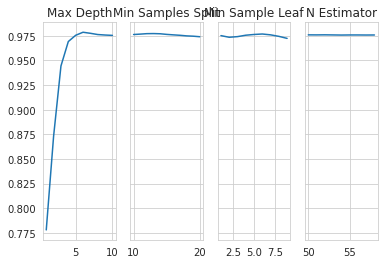

In [168]:
# Pour trouver les meilleurs parametre d'optimisation de l'arbre
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True) # aligner quatre colonne sur une ligne
# Max profondeur
rt_acc = []
rt_depth = range(1,11)
for i in rt_depth:
    rt = RandomForestRegressor(random_state=40, max_depth=i)
    rt.fit(X_train, y_train)
    rt_acc.append(rt.score(X_test, y_test))
ax1.plot(rt_depth,rt_acc)
ax1.set_title('Max Depth')

#Min feuille decoupee
rt_acc = []
rt_samples_split = range(10,21)
for i in rt_samples_split:
    rt = RandomForestRegressor(random_state=40, min_samples_split=i)
    rt.fit(X_train, y_train)
    rt_acc.append(rt.score(X_test, y_test))
ax2.plot(rt_samples_split,rt_acc)
ax2.set_title('Min Samples Split')

# Min feuille d'echantillon
rt_acc = []
rt_samples_leaf = range(1,10)
for i in rt_samples_leaf:
    rt = RandomForestRegressor(random_state=40, min_samples_leaf=i)
    rt.fit(X_train, y_train)
    rt_acc.append(rt.score(X_test, y_test))
ax3.plot(rt_samples_leaf,rt_acc)
ax3.set_title('Min Sample Leaf')

# N Estimateur
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=40, n_estimators=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))

ax4.plot(rf_estimators,rf_acc)
ax4.set_title('N Estimator')

plt.show()

### Optimisation de notre modele de regression de foret aleatoire avec GridSearchCV

In [169]:
# les parametres du modele optimiser avec GridSearchCV
param = {'max_depth' : [6,7,8],
              'min_samples_split': [11,12,13],
              'min_samples_leaf' : [4,5,6],
              'n_estimators': [50,51,52]}
# Creation de notre modele avec GridSearchCV
rf_random1 = GridSearchCV(rf_model, param, cv=10)
rf_random1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=40),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [11, 12, 13],
                         'n_estimators': [50, 51, 52]})

In [173]:
# Les scores du modele et prediction sur l'ensemble test apres optimisation
rf_rd_Score_train = "%.3f" % rf_random1.score(X_train, y_train)
rf_rd_Score_test = "%.3f" % rf_random1.score(X_test, y_test)

print("Train: ",rf_rd_Score_train)
print("Test: ",rf_rd_Score_test)

Train:  0.984
Test:  0.977


In [171]:
# Afficher les meilleurs parametres du modele apres optimisation
rf_random1.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 50}

In [172]:
# Valeurs predites apres optimisation
y_pred3 = rf_random1.predict(X_test)
R2_ = np.mean(r2_score(y_test, y_pred3))
print('R2 score = %.3f' % R2_)

R2 score = 0.977


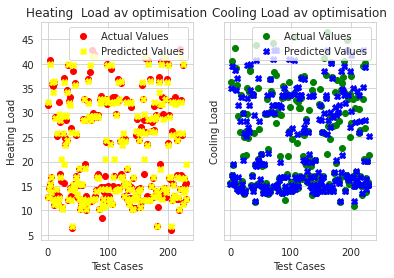

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [174]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" apres optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred3[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" apres optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred3[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

### Modele Regression arbre extra (Apprentissage, evaluation et visualisation)

In [177]:
# Creation du modele de regression d'arbre extra
ex_model = ExtraTreesRegressor(random_state=40)
ex_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=40)

In [179]:
# Les scores du modele et prediction sur l'ensemble test avant optimisation
ex_Score_train = "%.3f" % ex_model.score(X_train, y_train)
ex_Score_test = "%.3f" % ex_model.score(X_test, y_test)
print("Train: ",ex_Score_train)
print("Test: ",ex_Score_test)

Train:  1.000
Test:  0.972


In [178]:
# Valeurs predites avant optimisation
y_pred4 = ex_model.predict(X_test)
R2_ = np.mean(r2_score(y_test, y_pred4))
print('R2 score = %.3f' % R2_)

R2 score = 0.972


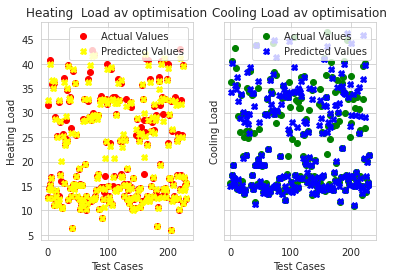

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [181]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" avant optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred4[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" avant optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred4[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

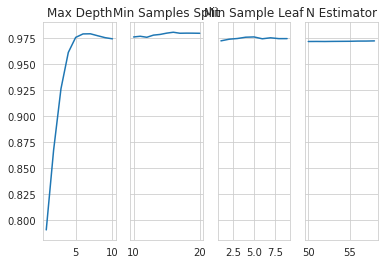

In [183]:
# Pour trouver les meilleurs parametre d'optimisation de l'arbre
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True) # aligner quatre colonne sur une ligne
# Max profondeur
ex_acc = []
ex_depth = range(1,11)
for i in ex_depth:
    ex = ExtraTreesRegressor(random_state=40, max_depth=i)
    ex.fit(X_train, y_train)
    ex_acc.append(ex.score(X_test, y_test))
ax1.plot(ex_depth,ex_acc)
ax1.set_title('Max Depth')

#Min feuille decoupee
ex_acc = []
ex_samples_split = range(10,21)
for i in ex_samples_split:
    ex = ExtraTreesRegressor(random_state=40, min_samples_split=i)
    ex.fit(X_train, y_train)
    ex_acc.append(ex.score(X_test, y_test))
ax2.plot(ex_samples_split,ex_acc)
ax2.set_title('Min Samples Split')

# Min feuille d'echantillon
ex_acc = []
ex_samples_leaf = range(1,10)
for i in ex_samples_leaf:
    ex = ExtraTreesRegressor(random_state=40, min_samples_leaf=i)
    ex.fit(X_train, y_train)
    ex_acc.append(ex.score(X_test, y_test))
ax3.plot(ex_samples_leaf,ex_acc)
ax3.set_title('Min Sample Leaf')

# N Estimateur
ex_acc = []
ex_estimators = range(50,59)
for i in ex_estimators:
    ex = ExtraTreesRegressor(random_state=40, n_estimators=i)
    ex.fit(X_train, y_train)
    ex_acc.append(ex.score(X_test, y_test))

ax4.plot(ex_estimators,ex_acc)
ax4.set_title('N Estimator')

plt.show()

### Optimisation de notre modele de regression d'arbre extra avec GridSearchCV

In [184]:
# Avec les parametres d'optimisation'
param = {'max_depth' : [6,7,8],
              'min_samples_split': [15,16,17],
              'min_samples_leaf' : [3,4,5],
              'n_estimators': [53,54,55]}
# Creation de notre modele avec GridSearchCV
ex_random = GridSearchCV(ex_model, param, cv=10)
ex_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=40),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [15, 16, 17],
                         'n_estimators': [53, 54, 55]})

In [186]:
# Les scores du modele et prediction sur l'ensemble test apres optimisation
ex_rd_Score_train = "%.3f" % ex_random.score(X_train, y_train)
ex_rd_Score_test = "%.3f" % ex_random.score(X_test, y_test)

print("Train: ",ex_rd_Score_train)
print("Test: ",ex_rd_Score_test)

Train:  0.984
Test:  0.980


In [185]:
# Les meilleurs parametres du modele apres optimisation
ex_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 17,
 'n_estimators': 55}

In [188]:
# Valeurs predites apres optimisation
y_pred5 = ex_random.predict(X_test)
R2_ = np.mean(r2_score(y_test, y_pred5))
print('R2 score = %.3f' % R2_)

R2 score = 0.980


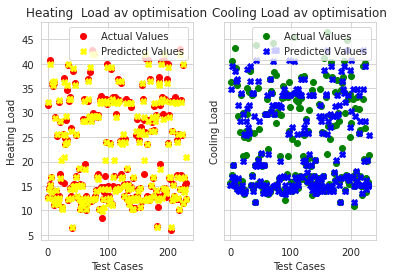

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [189]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # afficher sur une ligne en deux colonne
# "heating load" apres optimisation
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred5[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load av optimisation')
ax1.legend(loc = 'upper right')

# "cooling load" apres optimisation
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred5[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load av optimisation')
ax2.legend(loc = 'upper right')

plt.show()

### Conclusion

Evaluation de nos trois modeles avant d''inclure les parametres d''optimisation
* Le scroe R2 de **Decision Tree Regressor** model = 96.6%
* Le scroe R2 de **Random Forest Regressor** model = 97.5%
* Le scroe R2 de **Extra Trees Regressor** model = 97.2%

Evaluation de nos trois modeles apres avoir inclu les parametres d''optimisation en utilisant GridSearchCV
* Le scroe R2 de **Decision Tree Regressor** model = 97.8%
* Le scroe R2 de **Random Forest Regressor** model = 97.7%
* Le scroe R2 de **Extra Trees Regressor** model = 98.0%